In [49]:
import pandas as pd

train_infile="/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/fashion-mnist_train.csv"
test_infile="/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/fashion-mnist_test.csv"

train_df=pd.read_csv(train_infile)
test_df=pd.read_csv(test_infile)

In [50]:
from tensorflow.keras import utils
import numpy as np
y_train = train_df.pop('label')
y_train = utils.to_categorical(y_train, 10)
X_train=train_df

y_test = test_df.pop('label')
y_test = utils.to_categorical(y_test, 10)
X_test=test_df

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU


model = Sequential([
    Dense(128, activation=LeakyReLU(), input_dim=784),
    Dropout(0.5),
    Dense(64, activation=LeakyReLU()),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
hist = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 16.9946 - accuracy: 0.6306 - val_loss: 1.2222 - val_accuracy: 0.7992
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5798 - accuracy: 0.6800 - val_loss: 0.7083 - val_accuracy: 0.7683
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3485 - accuracy: 0.6773 - val_loss: 0.7970 - val_accuracy: 0.7812
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2216 - accuracy: 0.6949 - val_loss: 0.8459 - val_accuracy: 0.7312
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0782 - accuracy: 0.7147 - val_loss: 0.5710 - val_accuracy: 0.8103
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9854 - accuracy: 0.7221 - val_loss: 0.5949 - val_accuracy: 0.8051
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8773 - accuracy: 0.7384 - val_loss: 0.4978 - val_ac

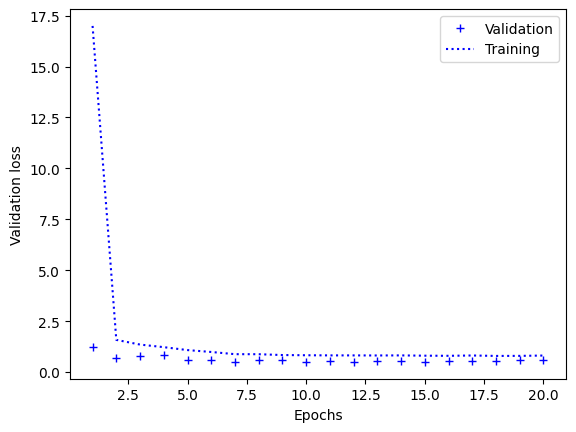

In [58]:
epochs = range(1, 21)
val_loss = hist.history['val_loss']
loss=hist.history['loss']

import matplotlib.pyplot as plt

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, loss, 'b:', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()